In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dbconfig import postgresStr
from sqlalchemy import create_engine

engine = create_engine(postgresStr)
connection = engine.connect()

In [7]:
emp_data = pd.read_sql("SELECT * FROM title_sal", connection)

In [8]:
emp_data.head()

,salary,title
0,"$78,228.00",Senior Staff
1,"$78,228.00",Staff
2,"$72,488.00",Engineer
3,"$42,365.00",Staff
4,"$55,881.00",Engineer


In [9]:
#converting salary column from string to float by dropping the dollar sign.

emp_data[emp_data.columns[0]] = emp_data[emp_data.columns[0]].replace('[\$,]', '', regex=True).astype(float)
emp_data

,salary,title
0,78228.0,Senior Staff
1,78228.0,Staff
2,72488.0,Engineer
3,42365.0,Staff
4,55881.0,Engineer
...,...,...
443303,41002.0,Senior Engineer
443304,40000.0,Staff
443305,52282.0,Staff
443306,40000.0,Senior Staff


In [10]:
# Grouping the data by title and getting the mean

mean_sal = emp_data.groupby(['title'])['salary'].mean()
mean_sal

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

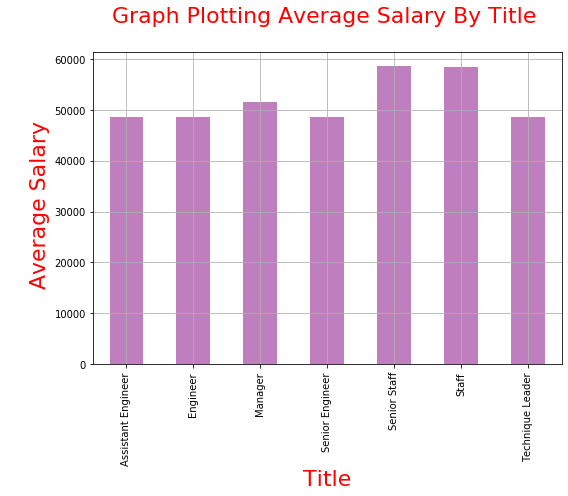

In [11]:
# plotting the bar graph

ax = mean_sal.plot(kind='bar', figsize=(8,7), color='purple', alpha=0.5)
ax.set_title("Graph Plotting Average Salary By Title \n", color='red', fontsize=22)
ax.set_xlabel("Title", fontsize=22, color='red')
ax.set_ylabel("\n Average Salary", fontsize=22, color='red')
plt.grid()
plt.tight_layout()
plt.savefig('Images/Bar Chart.png')
plt.show()

In [12]:
emp_sal = pd.read_sql("SELECT * FROM dept_sal", connection)
emp_sal.head()

,emp_no,last_name,first_name,salary,dept_no,dept_name
0,10005,Maliniak,Kyoichi,"$78,228.00",d003,Human Resources
1,10010,Piveteau,Duangkaew,"$72,488.00",d004,Production
2,10010,Piveteau,Duangkaew,"$72,488.00",d006,Quality Management
3,10011,Sluis,Mary,"$42,365.00",d009,Customer Service
4,10035,Chappelet,Alain,"$41,538.00",d004,Production


In [13]:
emp_sal[emp_sal.columns[3]] = emp_sal[emp_sal.columns[3]].replace('[\$,]', '', regex=True).astype(float)
emp_sal.head()

,emp_no,last_name,first_name,salary,dept_no,dept_name
0,10005,Maliniak,Kyoichi,78228.0,d003,Human Resources
1,10010,Piveteau,Duangkaew,72488.0,d004,Production
2,10010,Piveteau,Duangkaew,72488.0,d006,Quality Management
3,10011,Sluis,Mary,42365.0,d009,Customer Service
4,10035,Chappelet,Alain,41538.0,d004,Production


In [14]:
group_df = emp_sal.groupby(['emp_no'])['salary'].mean()
group_df.head()

emp_no
10001    60117.0
10002    65828.0
10003    40006.0
10004    40054.0
10005    78228.0
Name: salary, dtype: float64

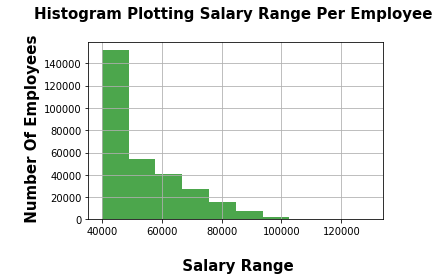

In [15]:
plt.hist(group_df, color="green", alpha=0.7)
plt.xlabel("\n Salary Range", fontsize=15, weight="bold")
plt.ylabel("\n Number Of Employees", fontsize=15, weight="bold")
plt.title("Histogram Plotting Salary Range Per Employee \n", fontsize=15, weight="bold")
plt.grid()
plt.tight_layout()
plt.savefig('Images/histogram.png')
plt.show()